<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

In [46]:
!pip install plotly

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.express as px

In [48]:
df=pd.read_csv('taxi-zone-lookup.csv')
df

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,Unknown


In [49]:
df.Zone.value_counts()

Governor's Island/Ellis Island/Liberty Island    3
Unknown                                          2
Corona                                           2
Ocean Hill                                       1
Parkchester                                      1
                                                ..
Fordham South                                    1
Forest Hills                                     1
Forest Park/Highland Park                        1
Fort Greene                                      1
Kew Gardens                                      1
Name: Zone, Length: 261, dtype: int64

In [50]:
data=pd.read_csv('uber-raw-data-apr14.csv')

In [51]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['week_day'] = data['Date/Time'].apply(lambda x: x.weekday())
data['hour'] = data['Date/Time'].apply(lambda x: x.hour)

In [52]:
data = data.drop(['Date/Time', 'Base'], axis=1)

In [53]:
data.describe(include='all')

,Lat,Lon,week_day,hour
count,564516.000000,564516.000000,564516.00000,564516.000000
mean,40.740005,-73.976817,2.86698,14.465043
std,0.036083,0.050426,1.82081,5.873925
min,40.072900,-74.773300,0.00000,0.000000
25%,40.722500,-73.997700,1.00000,10.000000
50%,40.742500,-73.984800,3.00000,16.000000
75%,40.760700,-73.970000,4.00000,19.000000
max,42.116600,-72.066600,6.00000,23.000000


In [54]:
data.isnull().sum()

Lat         0
Lon         0
week_day    0
hour        0
dtype: int64

In [55]:
data['week_day'].value_counts()

2    108631
1     91185
4     90303
3     85067
5     77218
0     60861
6     51251
Name: week_day, dtype: int64

In [56]:
data['hour'].value_counts()

17    45475
18    43003
16    42003
19    38923
21    36964
20    36244
15    35324
22    30645
14    27190
7     24924
8     22843
13    22603
23    20649
12    19425
11    18774
6     18498
9     17939
10    17865
0     11910
5      9476
1      7769
4      6095
3      5040
2      4935
Name: hour, dtype: int64

In [57]:
data['hour'] = data['hour'].apply(lambda x: '06-10/ Morning' if x>=6 and x<11
                                 else '11-13/ Lunch' if x>=11 and x<14
                                 else '14-17/ Afternon' if x>=14 and x<18
                                 else '18-23/ Afterwork' if x>=18 and x<=23
                                 else '00-5/ Night')

In [58]:
data.hour.value_counts()

18-23/ Afterwork    206428
14-17/ Afternon     149992
06-10/ Morning      102069
11-13/ Lunch         60802
00-5/ Night          45225
Name: hour, dtype: int64

In [59]:
data_sample = data.sample(n=100_000, random_state=42)

In [15]:
pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
Note: you may need to restart the kernel to use updated packages.


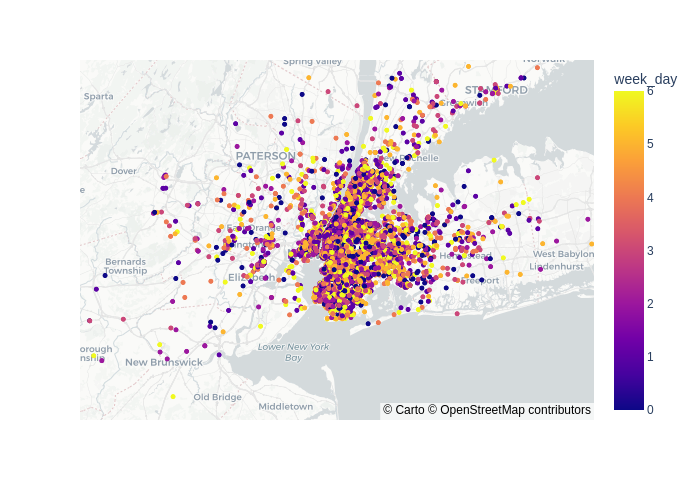

In [60]:
fig = px.scatter_mapbox(data_sample, lat='Lat', lon='Lon', color='week_day', mapbox_style='carto-positron')
fig.show("png")

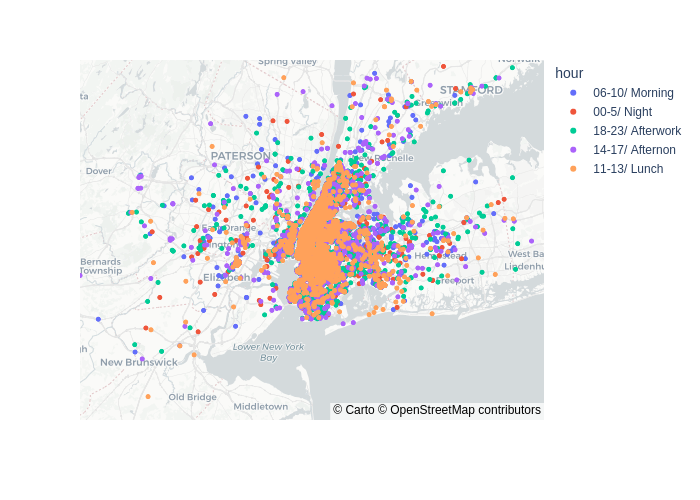

In [61]:
fig = px.scatter_mapbox(data_sample, lat='Lat', lon='Lon', color='hour', mapbox_style='carto-positron')
fig.show("png")

In [62]:
data_ = data_sample.drop('week_day', axis=1)
data_

,Lat,Lon,hour
77202,40.8021,-73.9654,06-10/ Morning
558915,40.6462,-73.7769,00-5/ Night
152635,40.7747,-73.9603,06-10/ Morning
361259,40.7150,-74.0157,18-23/ Afterwork
60087,40.7335,-74.0080,18-23/ Afterwork
...,...,...,...
151335,40.7273,-73.9921,00-5/ Night
30168,40.6951,-74.1782,00-5/ Night
462977,40.7436,-73.9891,18-23/ Afterwork
36696,40.7512,-74.0027,11-13/ Lunch


In [63]:
numeric_features = [0,1]
categoric_features = [2]

In [64]:
scaler = StandardScaler()
encode = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', encode, categoric_features),    
        ('num', scaler, numeric_features)
        ]
    )

data_ = featureencoder.fit_transform(data_)

In [65]:
data_sample[0:5]

,Lat,Lon,week_day,hour
77202,40.8021,-73.9654,2,06-10/ Morning
558915,40.6462,-73.7769,0,00-5/ Night
152635,40.7747,-73.9603,2,06-10/ Morning
361259,40.7150,-74.0157,4,18-23/ Afterwork
60087,40.7335,-74.0080,5,18-23/ Afterwork


In [66]:
data_[0:5]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.72088014,
         0.22020981],
       [ 0.        ,  0.        ,  0.        ,  0.        , -2.59974397,
         3.90536718],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.96151452,
         0.31991434],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.69301569,
        -0.76315048],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.18030533,
        -0.6126162 ]])

# KMEANS

In [67]:
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(data_)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 267210.7001399979
WCSS for K=2 --> 209450.04809831892
WCSS for K=3 --> 163079.51368886165
WCSS for K=4 --> 143732.88138486858
WCSS for K=5 --> 127302.01206877679
WCSS for K=6 --> 112420.25395922898
WCSS for K=7 --> 98167.77269387951
WCSS for K=8 --> 86893.10184533644
WCSS for K=9 --> 78588.47806933807
WCSS for K=10 --> 71531.84208525116


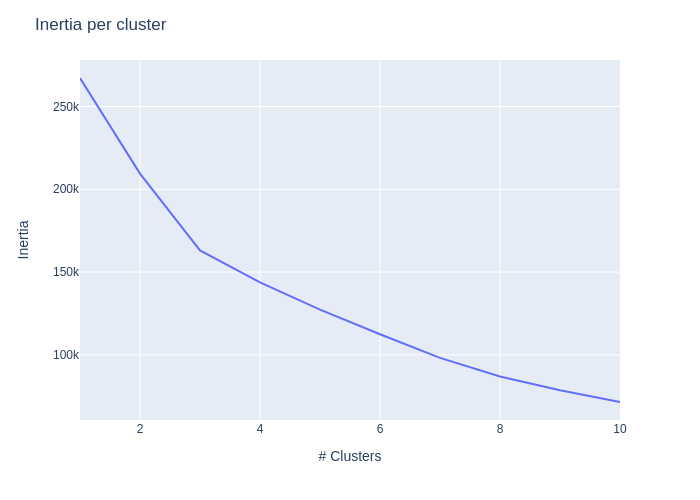

In [68]:
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="png") # if using workspace

In [69]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(data_)
    sil.append(silhouette_score(data_, kmeans.predict(data_)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.6392956393383652
Silhouette score for K=3 is 0.2450787897950966
Silhouette score for K=4 is 0.26990733367442765
Silhouette score for K=5 is 0.28324026429493904
Silhouette score for K=6 is 0.35614518070802254
Silhouette score for K=7 is 0.37319284312767004
Silhouette score for K=8 is 0.37503854790048
Silhouette score for K=9 is 0.4059327095682823
Silhouette score for K=10 is 0.3981247176393738


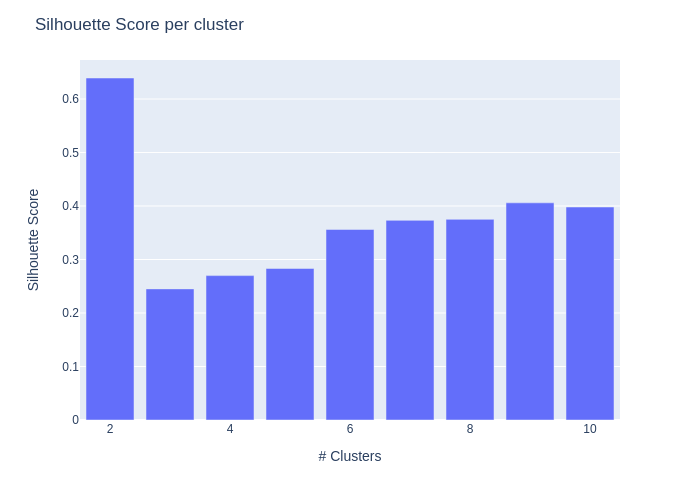

In [70]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="png") # if using workspace

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_)

KMeans(n_clusters=3, random_state=0)

In [29]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

In [30]:
data_sample['cluster_kmeans'] = kmeans.labels_

In [31]:
data_sample

,Lat,Lon,week_day,hour,cluster_kmeans
77202,40.8021,-73.9654,2,06-10/ Morning,0
558915,40.6462,-73.7769,0,00-5/ Night,2
152635,40.7747,-73.9603,2,06-10/ Morning,0
361259,40.7150,-74.0157,4,18-23/ Afterwork,1
60087,40.7335,-74.0080,5,18-23/ Afterwork,1
...,...,...,...,...,...
151335,40.7273,-73.9921,2,00-5/ Night,1
30168,40.6951,-74.1782,6,00-5/ Night,1
462977,40.7436,-73.9891,4,18-23/ Afterwork,1
36696,40.7512,-74.0027,1,11-13/ Lunch,0


In [32]:
data_sample['cluster_kmeans'].value_counts()

1    51224
0    45843
2     2933
Name: cluster_kmeans, dtype: int64

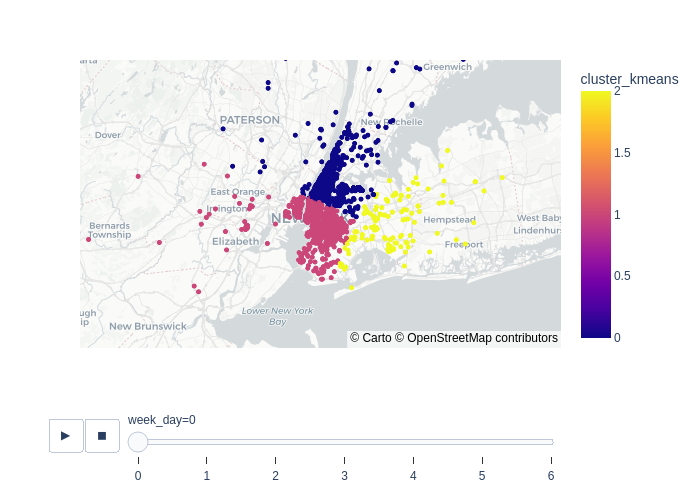

In [34]:
fig = px.scatter_mapbox(data_sample.sort_values('week_day'), lat='Lat', lon='Lon', color='cluster_kmeans',animation_frame='week_day', mapbox_style='carto-positron')
fig.show("png")

# DBSCAN

In [35]:
db = DBSCAN(eps=0.009, metric='manhattan', min_samples=30)
db.fit(data_)

DBSCAN(eps=0.009, metric='manhattan', min_samples=30)

In [36]:
np.unique(db.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])

In [37]:
data_sample['cluster'] = db.labels_

In [38]:
labels=db.labels_

In [39]:
list(labels).count(-1)

91983

In [40]:
data_sample

,Lat,Lon,week_day,hour,cluster_kmeans,cluster
77202,40.8021,-73.9654,2,06-10/ Morning,0,-1
558915,40.6462,-73.7769,0,00-5/ Night,2,23
152635,40.7747,-73.9603,2,06-10/ Morning,0,-1
361259,40.7150,-74.0157,4,18-23/ Afterwork,1,-1
60087,40.7335,-74.0080,5,18-23/ Afterwork,1,-1
...,...,...,...,...,...,...
151335,40.7273,-73.9921,2,00-5/ Night,1,-1
30168,40.6951,-74.1782,6,00-5/ Night,1,-1
462977,40.7436,-73.9891,4,18-23/ Afterwork,1,-1
36696,40.7512,-74.0027,1,11-13/ Lunch,0,-1


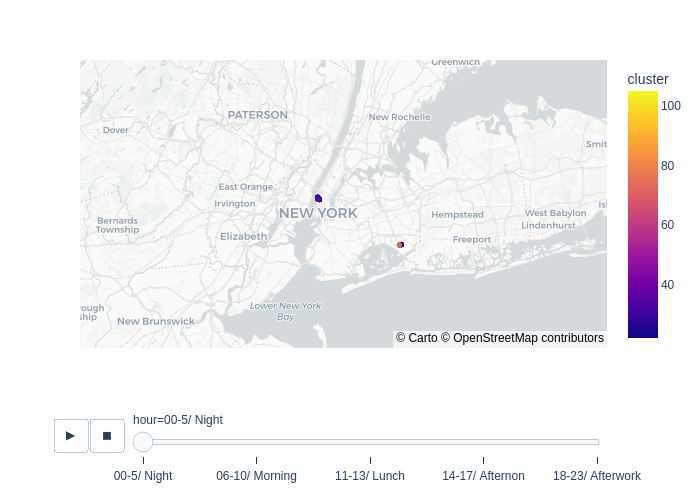

In [42]:
fig = px.scatter_mapbox(data_sample[(data_sample['cluster']!=-1)].sort_values('hour'), lat='Lat', lon='Lon', animation_frame='hour', color='cluster', mapbox_style='carto-positron')
fig.show('png')